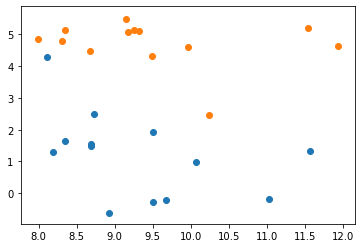

In [5]:
# Multinomial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.linear_model import LogisticRegression
import mglearn

warnings.filterwarnings(action="ignore") # warning 출력 제외

x, y = mglearn.datasets.make_forge()
# 먼저 간단하게 scatter(산점도)를 그려봄!
# y값이 0인 x를 추출 x 첫번째 컬럼 x축
# x 두번째 컬럼을 y축으로 scatter를 그려봄
blue = x[y == 0]
plt.scatter(blue[:,0], blue[:,1])

orange = x[y == 1]
plt.scatter(orange[:,0], orange[:,1])





In [8]:
# machine learning (Logistic Regression)
# train data set ( test data set 넘아감!)
train_x_data = x
train_y_data = y.reshape([-1,1])

# placeholder 
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# weight, bias
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# Cost(Loss) Function 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logit, labels=Y) )

# train node
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습진행
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict ={X: train_x_data, 
                                                      Y: train_y_data} )
    
    if step % 300 == 0:
        print("Cost value: {}".format(cost_val))




Cost value: 4.1864237785339355
Cost value: 0.25742974877357483
Cost value: 0.23799970746040344
Cost value: 0.23228392004966736
Cost value: 0.22996939718723297
Cost value: 0.22879305481910706
Cost value: 0.2280578464269638
Cost value: 0.22750908136367798
Cost value: 0.22704379260540009
Cost value: 0.2266177386045456


[1]


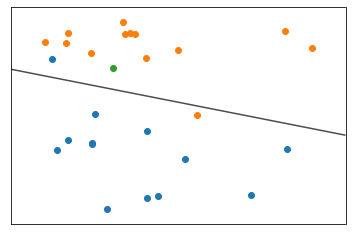

In [14]:
# 정확도 측정 (Accuracy) : 95 % 이상 나오면 쓸만한 모델
# Prediction (예측)

result = sess.run(H, feed_dict={ X : [[9,4]]})
result

model = LogisticRegression()
myModel = model.fit(x,y) # logistic model learning
print(myModel.predict([[9,4]])) # 1

blue = x[y == 0]
plt.scatter(blue[:,0], blue[:,1])

orange = x[y == 1]
plt.scatter(orange[:,0], orange[:,1])

mglearn.plots.plot_2d_separator(myModel, x, fill=False, eps=0.5, alpha=0.7)


plt.scatter(9,4)

## 로지스틱 회귀
### 오버피팅을 어떻게 피할거냐?
### 과적합을 피해라? 


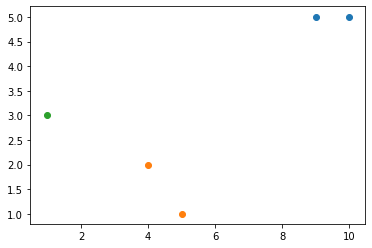

In [16]:
# 0.5 모델선 기준점을 0.5로 씀? 
# LOGISTIC 을 멀티노미얼로 확장
# X쪽 데이터는 시험성적과 출석점수
# Y쪽 데이터는 학점 
x = np.array([[10,5],
              [9,5],
              [5,1],
              [4,2],
              [1,3]])
y = np.array([["A"],
              ["A"],
              ["B"],
              ["B"],
              ["C"]])

plt.scatter(x[0:2,0], x[0:2,1]) # A 학점 점 을 찍어봄
plt.scatter(x[2:4,0], x[2:4,1]) # B 학점 점 을 찍어봄
plt.scatter(x[4,0], x[4,1]) # C 학점 점을 찍어봄

## 이선이 세개가 잇어야 되고 경계를 나눠줌
### 멀티노미얼을 이용해 A B C 영역을 잡아줌
#### 성적, 출석 => "A", "B", "C" 
#### 로지스틱 H = tf.sigmoid( tf.matmul(X,W) +b )
#### (x1, x2) * (w1 | w2) + b
#### (x1, x2) * (Wa1, Wb1, Wc1 | Wa2, Wb2, Wc2) + (b1, b2, b3)
#### 행렬값을 곱해 더해서 세개의 행렬값으로 만듬 
#### probability --> (0.3, 0.2, 0.5) 확률을 구할 떄 sigmoid 대신 softmax 